In [11]:
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Creedenciales de Acceso
client_id = 'dbf9c104187343e3b7e76bf70d0cfa3b'
client_secret = 'fa6e3a74ca44408aa31071cc8b14745e'

In [13]:
# Activación del Cliente de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Ejemplo para una Canción

In [14]:
# Búsqueda de Cancion Específica por ID
track_id = '7ovUcF5uHTBRzUpB6ZOmvt' # La canción se llama 'Idol', del anime Oshi no Ko
# track_id = '12usPU2WnqgCHAW1EK2dfd' # Esta se llama 'Ao no Sumika', del anime Jujutsu Kaisen

# Obtención de Información de la Canción
track_info = sp.track(track_id)

# Obtención de Estadísticas de la Canción
track_stats = sp.track(track_id)['popularity']

# Datos de la Canción
print(f'Título: {track_info["name"]}')
print(f'Artista: {track_info["artists"][0]["name"]}')
print(f'Álbum: {track_info["album"]["name"]}')
print(f'Duración: {track_info["duration_ms"] / 1000} segundos')  # Duración en segundos
print(f'Veces reproducida: {track_stats} veces')

Título: アイドル
Artista: YOASOBI
Álbum: アイドル
Duración: 213.233 segundos
Veces reproducida: 82 veces


## Tabla de Estadísticas Musicales de IDOL

In [15]:
song_indicators = []
song_indicators = sp.audio_features(track_id)

df_song_indicators = pd.DataFrame(song_indicators)

df_song_indicators['duration_min'] = df_song_indicators['duration_ms']/(1000*60)
df_song_indicators['name'] = sp.track(track_id)['name']

df_song_indicators = df_song_indicators[['id', 'name', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']]
print(df_song_indicators)

                       id  name  danceability  energy  key  loudness  \
0  7ovUcF5uHTBRzUpB6ZOmvt  アイドル         0.574   0.935    1    -2.783   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0926         0.112          0.000001     0.367    0.836  166.008   

   duration_min  
0        3.5539  


# Ejemplo para una Playlist

In [16]:
# Esta playlist corresponde a canciones utilizadas en Animes
playlist_id = '37i9dQZF1DWT8aqnwgRt92'

# Obtiene la información de la playlist
playlist_info = sp.playlist(playlist_id)

# Imprime información general de la playlist
print(f'Nombre de la playlist: {playlist_info["name"]}')
print(f'Descripción: {playlist_info["description"]}')
print(f'Propietario: {playlist_info["owner"]["display_name"]}')

df_song_indicators_f = pd.DataFrame()

# Creación de dataframe de datos de la playlist
for i, track in enumerate(playlist_info['tracks']['items'], 1):
    try:
        song_indicators = []
        
        a = track['track']['id']
        song_indicators = sp.audio_features(a)
        track_info = sp.track(a)

        df = pd.DataFrame(song_indicators)

        df['popularity'] = track_info['popularity']
        df['duration_min'] = df['duration_ms']/(1000*60)
        df['name'] = sp.track(a)['name']
        df = df.reset_index(drop = True)

        df_song_indicators_f = pd.concat([df_song_indicators_f, df], axis = 0)

        df_song_indicators_f = df_song_indicators_f[['id', 'name', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']]
        
    except:
        pass

df_song_indicators_f = df_song_indicators_f.reset_index(drop = True)
print(df_song_indicators_f)

Nombre de la playlist: Anime Now
Descripción: Hottest Anime tracks & best new sounds for all Anime fans! 最新アニメシーンの話題曲をまとめてお届け！Illustration by <a href="https://kazuhisauragami.com/"> Kazuhisa Uragami</a>
Propietario: Spotify
                        id                  name  popularity  danceability  \
0   0kdqcbwei4MDWFEX5f33yG  Bling-Bang-Bang-Born          78         0.853   
1   5eY7692tmgHB9dbmq6wa2M                    晴る          71         0.695   
2   0Zp9WOkXX8xZS8QOhtdQ5k                 LEveL          70         0.682   
3   3rki2mgXaUSL8av1syOWTB                あーーっす！          63         0.421   
4   5oQpH1uuZte4axR411rIlN              SPECIALZ          70         0.560   
..                     ...                   ...         ...           ...   
80  1zSDvAdbpQoSuVJ9jLHGJD                 Otowa          31         0.606   
81  558Rz2INvrgzVBEBdUFLZk                果てのない旅          28         0.612   
82  3cGLkrUEaEWIMCNVMpCtt2            Green jade          24         0.534

## Canciones más Populares

In [17]:
df_song_indicators_f[['name', 'popularity']].sort_values(by = 'popularity', ascending = False).head(10)

# De esta lista, la más popular es 'Ao no Sumika (青のすみか)'. Esta canción se utilizó como el opening...
# ... del arco de Muerte Prematura en Jujutsu Kaisen

# En segundo lugar, esta Idol, que se utilizó en el anime Oshi no Ko

,name,popularity
38,青のすみか,84
36,アイドル,82
7,花になって - Be a flower,79
0,Bling-Bang-Bang-Born,78
25,最高到達点,78
12,more than words,77
11,勇者,75
32,地球儀 - Spinning Globe,74
27,Biri-Biri,73
41,燈,72


### Relación de Atributos

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'duration_min')]

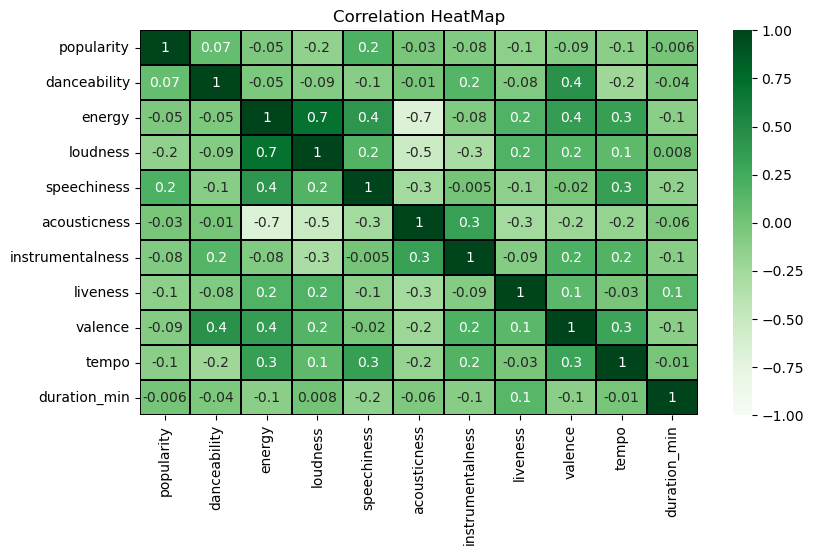

In [21]:
# Correlación entre Características de las Canciones de Anime

td = df_song_indicators_f.drop(['id','name','key'], axis=1).corr(method = 'pearson')
plt.figure(figsize=(9,5))
hmap = sns.heatmap(td, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=0.1, linecolor='black')
hmap.set_title('Correlation HeatMap')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90)

[Text(0.5, 1.0, 'Gráfico de Regresión - Loudness vs Energy')]

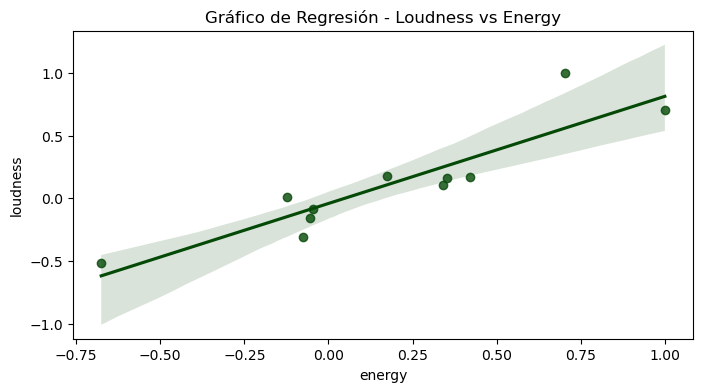

In [22]:
#Visualización del cruce 'energy' vs 'loudness' como modelo de regresión lineal
plt.figure(figsize=(8,4))
sns.regplot(data=td, y='loudness', x='energy', color='#054907').set(title='Gráfico de Regresión - Loudness vs Energy')